In [2]:
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [17]:
np.set_printoptions(precision=4)

In [16]:
def print_statistics(data):
    size = np.size(data)
    print(f'Expectation: {np.mean(data)}')
    print(f'Variance: {np.var(data)}')
    print(f'Median: {(data[size // 2 - 1] + data[size // 2]) / 2}')
    print(f'1/4 and 1/3 quantile: {np.quantile(data, 1/4)}, {np.quantile(data, 1/3)}')
    print(f'Corrected variance: {np.var(data) * n / (n - 1)}')
    print(f'Skewness: {stat.kstat(data, 3) / stat.kstat(data, 2) ** 1.5}')
    print(f'Excess: {stat.moment(data, 4) / stat.moment(data, 2) ** 2}')
    print(f'Variation coef: { np.var(data)**0.5 / np.mean(data)}')    

In [4]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return stat.truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [5]:
def generate_poission(n, lambd, a, b):
    poisson = np.random.default_rng().poisson(lambd, n * 5)
    return np.extract(np.logical_and(a <= poisson, poisson <= b), poisson)
def generate_exponential(n, lambd, a, b):
    exp = np.random.default_rng().exponential(lambd, n * 13)
    return np.extract(np.logical_and(a <= exp, exp <= b), exp)
def generate_cauchy(n, shift, sscale, a, b):
    cauchy = stat.cauchy.rvs(loc=shift, scale=sscale, size=n * 50)
    return np.extract(np.logical_and(a <= cauchy, cauchy <= b), cauchy)

In [6]:
def conf_interval_exp(data, alpha, var):
    point_expectation = np.mean(data)
    u_half_alpha = -stat.norm.ppf(alpha / 2)
    
    mu_lower = point_expectation - u_half_alpha * (var / n)**0.5
    mu_higher = point_expectation + u_half_alpha * (var / n)**0.5
    return mu_lower, mu_higher

def conf_interval_var(data, n, alpha):
    s2 = np.var(data) * n / (n - 1)
    df = n - 1
    chi2_half_alpha = stat.chi2.ppf(alpha / 2, df)
    chi2_one_minus_half_alpha = stat.chi2.ppf(1 - alpha / 2, df)

    sigma2_lower = (n - 1) * s2 / chi2_one_minus_half_alpha
    sigma2_higher = (n - 1) * s2 / chi2_half_alpha
    return sigma2_lower, sigma2_higher

def conf_interval_exp_student(data, n, alpha):
    point_expectation = np.mean(data)
    s2 = np.std(data) * n / (n - 1)
    t_half_alpha = -stat.t.ppf(q=alpha / 2, df=n-1)
    
    mu_lower = point_expectation - t_half_alpha * (s2 / n)**0.5
    mu_higher = point_expectation + t_half_alpha * (s2 / n)**0.5
    return mu_lower, mu_higher


In [50]:
def in_range(x, interval):
    a, b = interval
    if a <= x <= b:
        return True
    return False
def pairwise(iterable):
    "s -> (s0, s1), (s1, s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

def group_data(data, k):
    x0 = math.floor(min(data))
    xn = math.ceil(max(data))
    bounds = [x0 + i * (xn - x0) / k for i in range(k + 1)]
    intervals = list(pairwise(bounds))
    invervals_mids = [(a + b) / 2 for (a, b) in intervals]
    grouped = np.zeros(np.size(data))
    for i in range(np.size(data)):
        entry_group = [j for j in range(k) if in_range(data[i], intervals[j])][0]
        grouped[i] = invervals_mids[entry_group]
    
    _, counts = np.unique(grouped, return_counts=True)
    scaled_counts = [x  for x in counts]
    plt.bar(invervals_mids, [x for x in scaled_counts], 
            width = bounds[1] - bounds[0],
            edgecolor='red')
    plt.show()
    return grouped

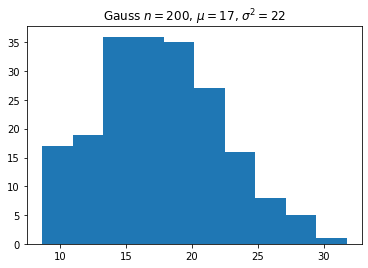

Expectation: 17.660637791170938
Variance: 21.45665608510598
Median: 14.527416315556394
1/4 and 1/3 quantile: 14.315366325070752, 15.273746721458714
Corrected variance: 21.564478477493445
Skewness: 0.2477099063603609
Excess: 2.6985201839857584
Variation coef: 0.2622857141378763


In [18]:
n = 200
a = 5
b = 7
gauss_exp = 17
gauss_var = 22
# gauss = get_truncated_normal(gauss_exp, gauss_var**0.5, a, b) # 2nd param is standard deviation, not variance
gauss_sample = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
plt.hist(gauss_sample)
plt.title(f'Gauss $n = {n}$, $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$')
plt.show()
print_statistics(gauss_sample)

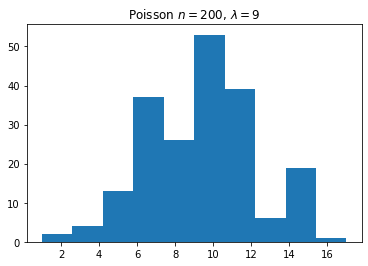

Expectation: 9.195
Variance: 8.176975
Median: 9.5
1/4 and 1/3 quantile: 7.0, 8.0
Corrected variance: 8.218065326633166
Skewness: 0.06825862395407202
Excess: 2.825967129800249
Variation coef: 0.31098869462656864


In [19]:
poission_param = 9
# poisson = generate_poission(n, poission_param, a, b)[:n]
poisson = np.random.default_rng().poisson(poission_param, n)
plt.hist(poisson)
plt.title(f'Poisson $n = {n}$, $\lambda = {poission_param}$')
plt.show()
print_statistics(poisson)

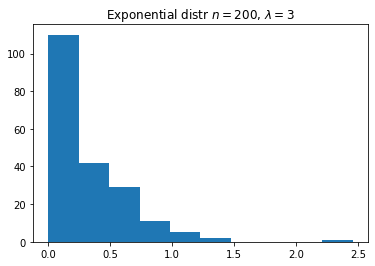

Expectation: 0.3210021544605536
Variance: 0.10245389410245892
Median: 0.6208659325121009
1/4 and 1/3 quantile: 0.09687996741792337, 0.13010447498183222
Corrected variance: 0.10296873779141599
Skewness: 2.3417841418706105
Excess: 12.500567545064886
Variation coef: 0.9971403431725843


In [26]:
exp_param = 3
# exp = generate_exponential(n, 3, a, b)[:n]
exp = np.random.default_rng().exponential(1 / exp_param, n)
plt.hist(exp)
plt.title(f'Exponential distr $n = {n}$, $\lambda = {exp_param}$')
plt.show()
print_statistics(exp)

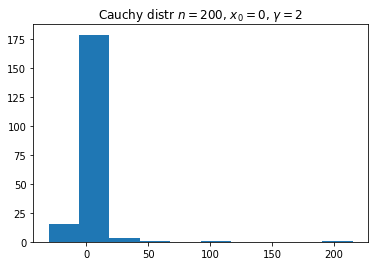

Expectation: 1.8350367347166072
Variance: 326.7005041502497
Median: 3.2488214672150635
1/4 and 1/3 quantile: -1.866810892446299, -1.0909989811496295
Corrected variance: 328.3422152263816
Skewness: 9.175047734420975
Excess: 101.92426287492576
Variation coef: 9.84986185938209


In [30]:
cauchy_shift = 0
cauchy_scale = 2
# cauchy = generate_cauchy(n, cauchy_shift, cauchy_scale, a, b)[:n]
cauchy = stat.cauchy.rvs(loc=cauchy_shift, scale = cauchy_scale, size=n)
plt.hist(cauchy)
plt.title(f'Cauchy distr $n = {n}$, $x_0 = {cauchy_shift}$, $\gamma = {cauchy_scale}$')
plt.show()
print_statistics(cauchy)

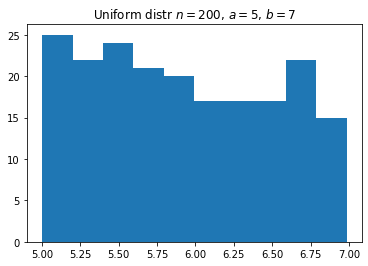

Expectation: 5.923975575981217
Variance: 0.3273612706852904
Median: 6.470396315137217
1/4 and 1/3 quantile: 5.421638707398355, 5.5704840036629815
Corrected variance: 0.3290063021962718
Skewness: 0.15660077661319471
Excess: 1.8078075217225555
Variation coef: 0.09658293295958721


In [56]:
uniform = np.random.default_rng().uniform(low=a, high=b, size=n)
plt.hist(uniform)
plt.title(f'Uniform distr $n = {n}$, $a = {a}$, $b = {b}$')
plt.show()
print_statistics(uniform)


# Interval estimation for gauss expectation and variance

In [32]:
alpha = 0.05

In [58]:
gauss_exp = 4
gauss_var = 9

# 2nd param is standard deviation, not variance
# gauss_sample = get_truncated_normal(gauss_exp, gauss_var**0.5, a, b).rvs(size=n) 
gauss_sample = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)


mu_lower, mu_higher = conf_interval_exp(gauss_sample, alpha, gauss_var)
print(f"error: {alpha}")
print(f"point estimation: {np.mean(gauss_sample)}")
print("confidence interval for expectation w/ actual sigma")
print(f'lower bound for expectation: {mu_lower}')
print(f'higher bound for expectation: {mu_higher}')

error: 0.05
point estimation: 4.147530672544435
confidence interval for expectation w/ actual sigma
lower bound for expectation: 3.7317595252395317
higher bound for expectation: 4.563301819849339


In [59]:
sigma2_lower, sigma2_higher = conf_interval_var(gauss_sample, n, alpha) 

print(f"point estimation: {np.var(gauss_sample)}")
print(f'lower bound for variance: {sigma2_lower}')
print(f'higher bound for variance: {sigma2_higher}')

point estimation: 8.098260067739071
lower bound for variance: 6.749683951953067
higher bound for variance: 10.008590634659871


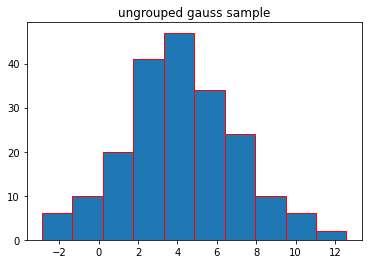

In [60]:
plt.hist(gauss_sample, edgecolor = 'red')
plt.title("ungrouped gauss sample")
plt.show()

# Grouped gauss confidence intervals

grouped gauss sample, k = 8


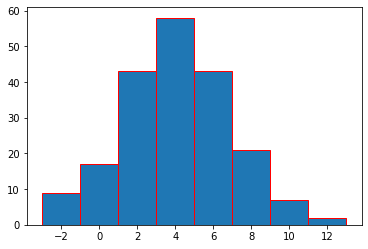

point estimation: 4.1
lower bound for expectation: 3.6842288526950964
higher bound for expectation: 4.515771147304903

point estimation: 8.27
lower bound for variance: 6.892824608710801
higher bound for variance: 10.220842978156632


In [61]:
k = 8
print(f'grouped gauss sample, k = {k}')
grouped = group_data(gauss_sample, k)

mu_lower_group, mu_higher_group = conf_interval_exp(grouped, alpha, gauss_var)
print(f"point estimation: {np.mean(grouped)}")
print(f'lower bound for expectation: {mu_lower_group}')
print(f'higher bound for expectation: {mu_higher_group}\n')

sigma2_lower_group, sigma2_higher_group = conf_interval_var(grouped, n, alpha) 
print(f"point estimation: {np.var(grouped)}")
print(f'lower bound for variance: {sigma2_lower_group}')
print(f'higher bound for variance: {sigma2_higher_group}')

#  Expectation confidence interval w/ student's quantiles

In [64]:
mu_lower_student, mu_higher_student = conf_interval_exp_student(gauss_sample, n, alpha)
print("gauss expectation with no known variance")
print(f'lower bound for expectation: {mu_lower_student}')
print(f'higher bound for variance: {mu_higher_student}')

print("\ngrouped gauss expectation w/ actual variance")
print(f"point estimation: {np.mean(grouped)}")
print(f'lower bound for expectation: {mu_lower_group}')
print(f'higher bound for expectation: {mu_higher_group}\n')

print("\nungrouped gauss expectation w/ actual variance")
print(f"point estimation: {np.mean(gauss_sample)}")
print(f'lower bound for expectation: {mu_lower}')
print(f'higher bound for expectation: {mu_higher}\n')


gauss expectation with no known variance
lower bound for expectation: 3.9117171357957146
higher bound for variance: 4.383344209293155

grouped gauss expectation w/ actual variance
point estimation: 4.1
lower bound for expectation: 3.6842288526950964
higher bound for expectation: 4.515771147304903


ungrouped gauss expectation w/ actual variance
point estimation: 4.147530672544435
lower bound for expectation: 3.7317595252395317
higher bound for expectation: 4.563301819849339

